# Analysis **AirBNB NYC 2019** 

*by Mohammad Attala Rajafar*

**Breakdown of this notebook:**

1. **Acquisition:**
   - Importing library
   - Load dataset
2. **Preprocessing:** 
   - Deleting redundant columns.
   - Dropping duplicates.
   - Cleaning individual columns.
   - Remove the NaN values from the dataset
   - Some Transformations
3. **Visualization:** Using plots to find relations between the features.
    - Correlation
    - Host ID
    - Neighbourhood
    - Room
    - Map New York Airbnb
4. **Regression**
    - Linear Regression
    - Decision Tree Regression
    - Random Forest Regression

### Acquisition

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium

%matplotlib inline
pd.set_option('Display.max_columns', None)
sns.set(color_codes=True)
warnings.filterwarnings("ignore")


Load Dataset (CSV)

In [2]:
csv = 'D:\\Work\\Tech\\Data Science\\Python\\Notebook\\Air BNB New York 2019\\Data\\AB_NYC_2019.csv'
df = pd.read_csv(csv, delimiter=',')
df.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Show column shapes and info

In [3]:
df.shape


(48895, 16)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Preprocessing

Remove duplicates if any

In [5]:
duplicat = df[df.duplicated()]
print('Duplicated (Row, Column):', duplicat.shape)


Duplicated (Row, Column): (0, 16)


In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


NaN/Null values in data

In [7]:
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Drop unnecessary columns

In [8]:
df.drop(['name', 'id', 'host_name', 'last_review'], axis=1, inplace=True)
df.head(5)


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Replace the 'review per month' NaNN by 0 

In [9]:
df.fillna({'review_per_month': 0}, inplace=True)
# Examing changes
df.reviews_per_month.isnull().sum()


10052

Drop NaN/Null

In [10]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         38843 non-null  int64  
 1   neighbourhood_group             38843 non-null  object 
 2   neighbourhood                   38843 non-null  object 
 3   latitude                        38843 non-null  float64
 4   longitude                       38843 non-null  float64
 5   room_type                       38843 non-null  object 
 6   price                           38843 non-null  int64  
 7   minimum_nights                  38843 non-null  int64  
 8   number_of_reviews               38843 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  38843 non-null  int64  
 11  availability_365                38843 non-null  int64  
dtypes: float64(3), int64(6), object(

Show cleaned data

In [11]:
df.isnull().sum()


host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Examine continous variables

In [12]:
df.describe()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Print all columns name

In [13]:
df.columns


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Current data shape

In [14]:
df.shape


(38843, 12)

### Visualization

#### Correlation

##### Get correlation between diffrent variables

Text(0.5, 1.0, 'Correlation map')

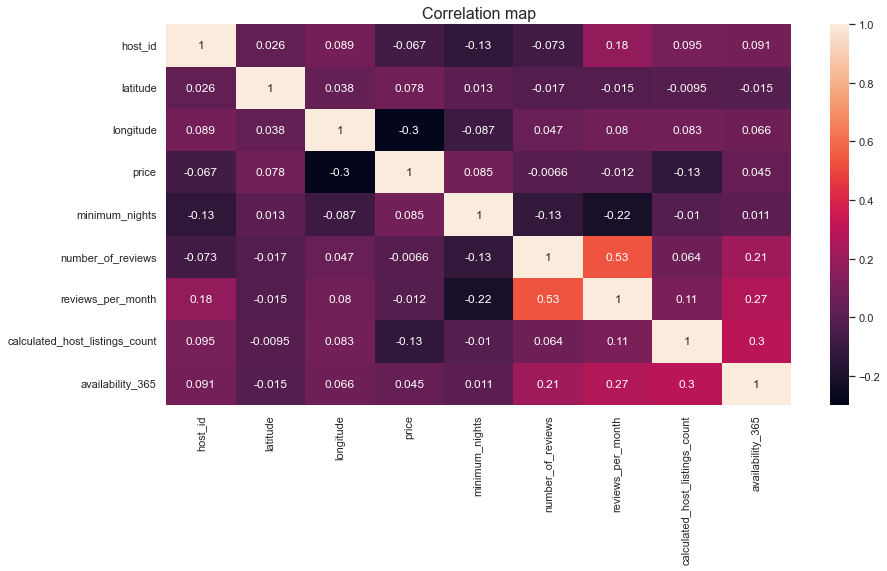

In [15]:
corr = df.corr(method='kendall')
plt.figure(figsize=(14, 7))
sns.heatmap(corr, annot=True)
df.columns
# Styling
title_font = 16
plt.title('Correlation map', fontsize=title_font)


#### Host ID

##### List Top 5 Most values count for host_id

In [16]:
hostID = df['host_id'].value_counts()[:5]
hostID


219517861    207
61391963      79
16098958      61
137358866     51
7503643       49
Name: host_id, dtype: int64

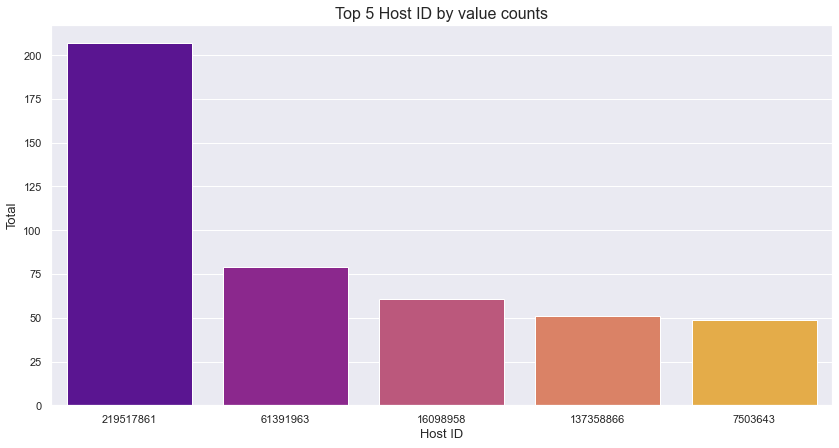

In [17]:
# Visualization
plt.figure(figsize= (14,7))
sns.barplot(x=hostID.index, y=hostID.values, order=hostID.index[:5], palette='plasma')
# Styling
title_font = 16
xyfont = 13
plt.xlabel('Host ID', fontsize=xyfont)
plt.ylabel('Total', fontsize=xyfont)
plt.title('Top 5 Host ID by value counts', fontsize=title_font)

plt.show()

#### Neighborhood

##### Neighborhood map

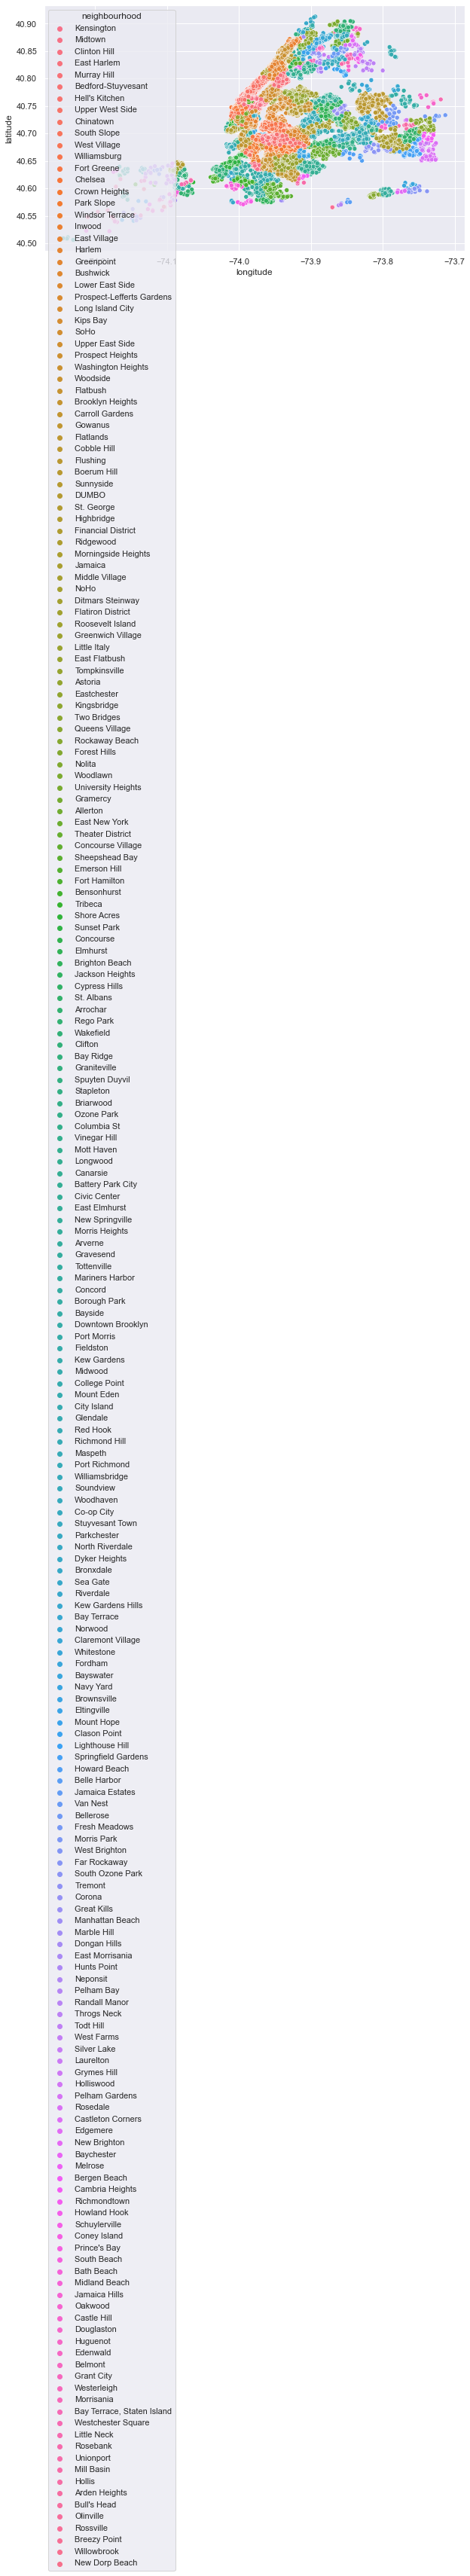

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df.longitude, df.latitude, hue=df.neighbourhood)
plt.ioff()


##### Neighborhood group map

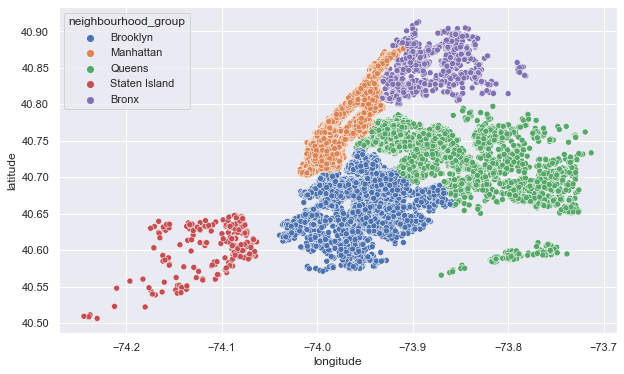

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df.longitude, df.latitude,
                hue=df.neighbourhood_group)
plt.ioff()


##### Neighborhood distribution

In [20]:
df['neighbourhood_group'].value_counts()


Manhattan        16632
Brooklyn         16447
Queens            4574
Bronx              876
Staten Island      314
Name: neighbourhood_group, dtype: int64

Text(0, 0.5, 'Total value count')

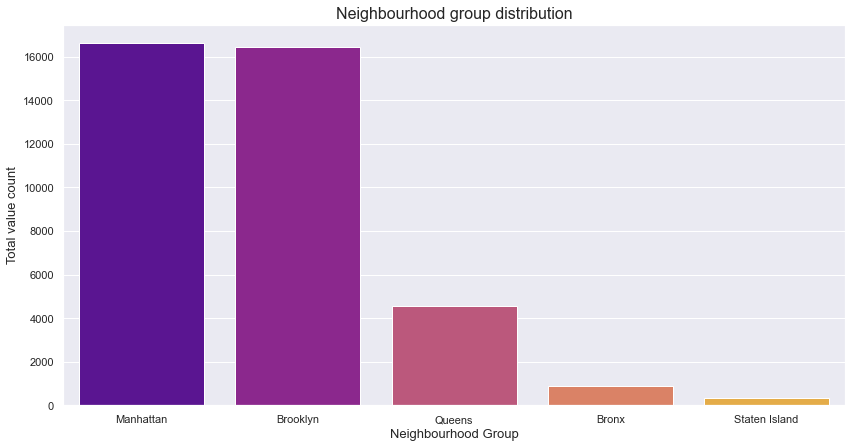

In [21]:
# Visualization
plt.figure(figsize=(14,7))
sns.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index, palette='plasma')
# Styling
title_font = 16
xyfont = 13
plt.title('Neighbourhood group distribution', fontsize=title_font)
plt.xlabel('Neighbourhood Group',fontsize=xyfont)
plt.ylabel('Total value count',fontsize=xyfont)

##### The mean price and avg price of each neighbourhood_group of a room

In [22]:
ngroup = [i for i in df['neighbourhood_group'].unique()]
ngroup


['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [23]:
# Create new var to know all mean value on price column
mean_price = df['price'].mean()
mean_price

142.317946605566

In [24]:
# Create new var to know each mean value on neighbourhood_group based on mean of the price column
nei_mean = []
for i in ngroup:
    nei_mean.append(df[df['neighbourhood_group'] == i]['price'].mean())

nei_mean


[121.44871405119474,
 180.05248917748918,
 95.76257105378225,
 89.96496815286625,
 79.55365296803653]

In [25]:
# Add new var to make new column on DataFrame for viz
nei_avprice = pd.DataFrame({'neighbour_group': ngroup,
                            'avg_price': nei_mean,
                           'mean_price': mean_price})
nei_avprice


,neighbour_group,avg_price,mean_price
0,Brooklyn,121.448714,142.317947
1,Manhattan,180.052489,142.317947
2,Queens,95.762571,142.317947
3,Staten Island,89.964968,142.317947
4,Bronx,79.553653,142.317947


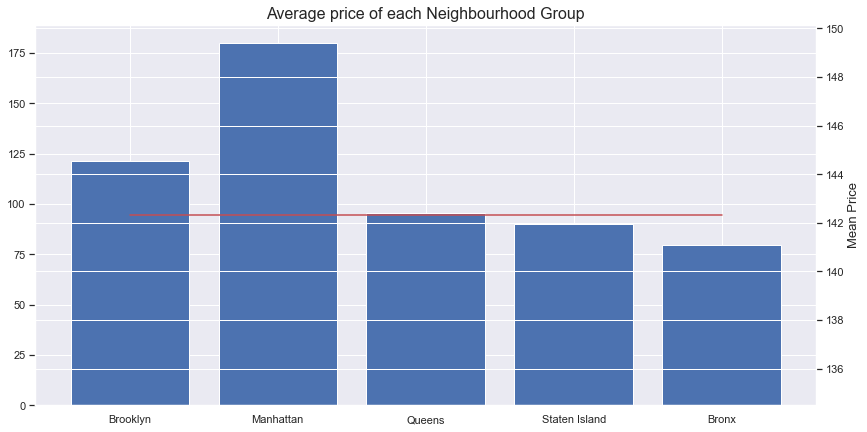

In [26]:
# Visualization
plt.figure(figsize=(14,7))
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.bar(x='neighbour_group', height='avg_price', data=nei_avprice)
ax2.plot('neighbour_group', 'mean_price', data=nei_avprice, color='r')
# Styling
title_font = 16
xyfont = 13
plt.title('Average price of each Neighbourhood Group', fontsize=title_font)
plt.ylabel('Mean Price',fontsize=xyfont)

plt.show()

##### Neighborhood group with the average number of reviews

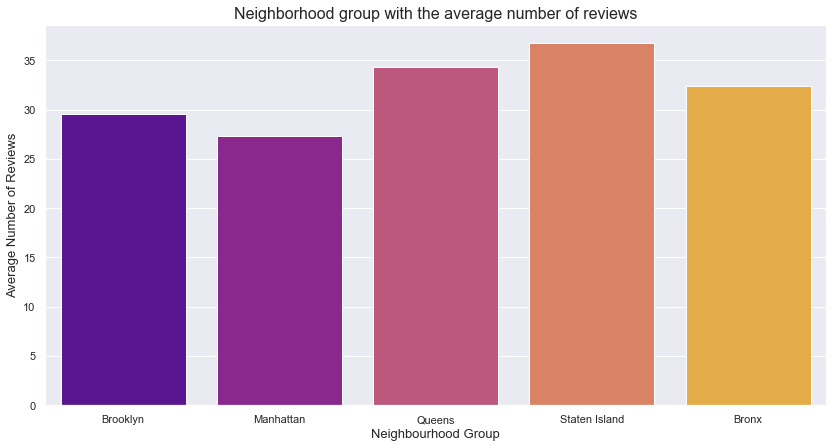

In [27]:
dataBaru = df['neighbourhood_group'].unique()
data = []

for c in dataBaru:
    d = df[df['neighbourhood_group'] == c]
    counts = d['number_of_reviews'].mean()
    data.append([c, counts])

dt = pd.DataFrame(data, columns=['city', 'review'])

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='city', y='review', data=dt, palette='plasma')

# Styling
title_font = 16
xyfont = 13
plt.title('Neighborhood group with the average number of reviews',
          fontsize=title_font)
plt.xlabel('Neighbourhood Group', fontsize=xyfont)
plt.ylabel('Average Number of Reviews', fontsize=xyfont)

plt.show()


#### Room

##### Room type map

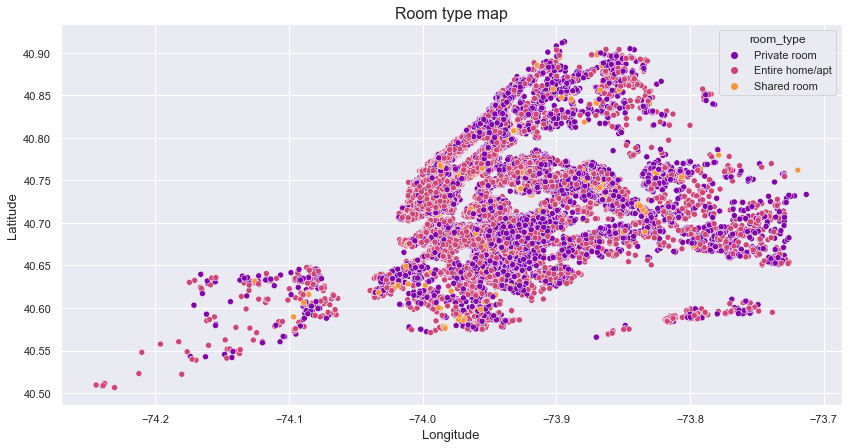

In [28]:
plt.figure(figsize=(14, 7))
sns.scatterplot(df.longitude, df.latitude, hue=df.room_type, palette='plasma')
# Styling
title_font = 16
xyfont = 13
plt.title('Room type map', fontsize=title_font)
plt.xlabel('Longitude', fontsize=xyfont)
plt.ylabel('Latitude', fontsize=xyfont)
plt.ioff()


##### Availability room map

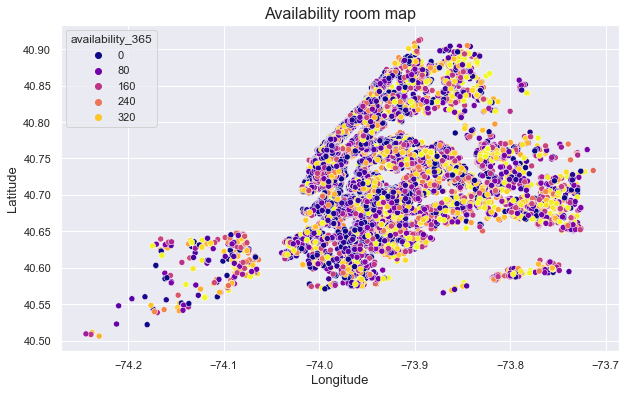

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df.longitude, df.latitude,
                hue=df.availability_365, palette='plasma')
plt.ioff()
# Styling
title_font = 16
xyfont = 13
plt.title('Availability room map', fontsize=title_font)
plt.xlabel('Longitude', fontsize=xyfont)
plt.ylabel('Latitude', fontsize=xyfont)
plt.ioff()


##### Room type by Neighborhood Group

In [30]:
# Define Function
def show_values_on_bars(axs, h_v='v', space=0.4):
    def _show_on_single_plot(ax):
        if h_v == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha='center')
        elif h_v == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


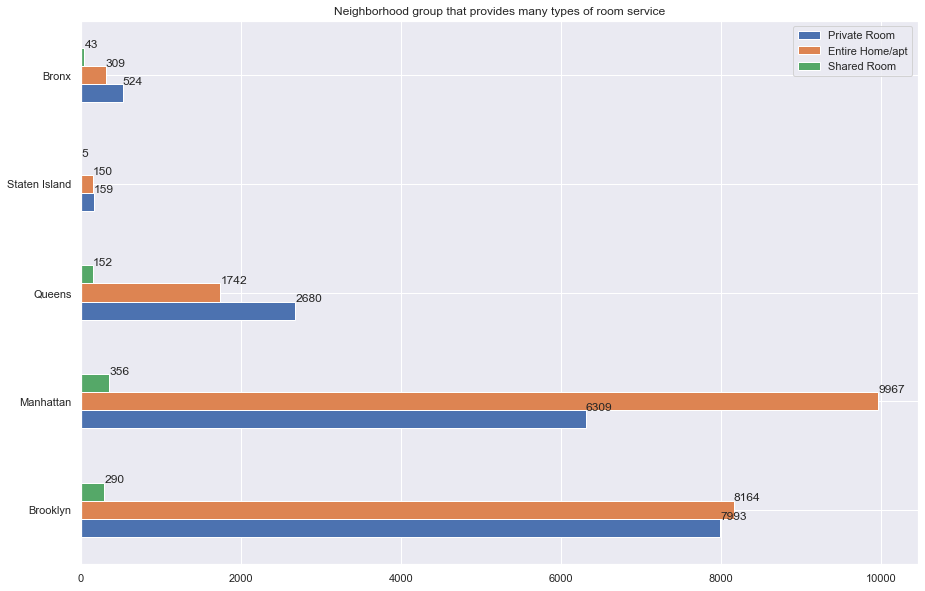

In [31]:
dataBaru = df['neighbourhood_group'].unique()
data = []

for c in dataBaru:
    d = df[df['neighbourhood_group'] == c]
    Private_room = d['room_type'].str.count('Private room').sum()
    Entire_home = d['room_type'].str.count('Entire home/apt').sum()
    Shared_room = d['room_type'].str.count('Shared room').sum()
    data.append([c, Private_room, Entire_home, Shared_room])

dt = pd.DataFrame(data, columns = ['room_type', 'Private Room', 'Entire Home', 'Shared Room'])
dtBaru = []
dtPrivate = []
dtEntire = []
dtShared = []

for h in dt['room_type']:
    dtBaru.append(h)

for j in dt['Private Room']:
    dtPrivate.append(j)
    
for q in dt['Entire Home']:
    dtEntire.append(q)

for r in dt['Shared Room']:
    dtShared.append(r)

dts = pd.DataFrame({'Private Room': dtPrivate, 'Entire Home/apt': dtEntire, 'Shared Room': dtShared}, index=dtBaru)
ax = dts.plot.barh(figsize=(15,10), title='Neighborhood group that provides many types of room service')

show_values_on_bars(ax, 'h', 0.20)

From the graph above, it can be concluded that the city of Manhattan is the city that offers the most types of Entire Home/Ap and types of Shared Room, which is 9967 for Entire Home and 356 for Shared Room. While the city of Brooklyn is the city that offers the most types of Private Room, as many as 7993.

##### Count values of room type

Text(0.5, 1.0, 'Room Type')

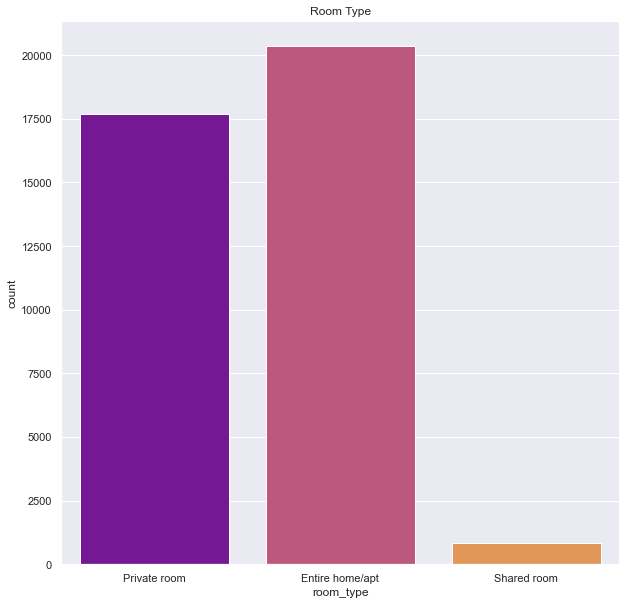

In [32]:
sns.countplot(df['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Room Type')


##### Relation between neighbourhood_group and availability of room

Text(0, 0.5, 'Availability')

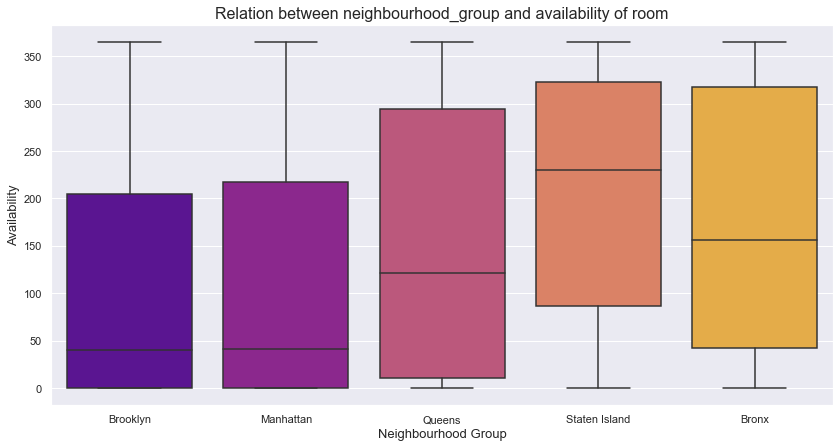

In [33]:
plt.figure(figsize=(14,7))
ax = sns.boxplot(data=df, x='neighbourhood_group',
                y='availability_365',palette='plasma')
# Styling
title_font = 16
xyfont = 13
plt.title('Relation between neighbourhood_group and availability of room',
          fontsize=title_font)
plt.xlabel('Neighbourhood Group',fontsize=xyfont)
plt.ylabel('Availability',fontsize=xyfont)

#### Map of Newyork City Airbnb

In [34]:
from folium.plugins import HeatMap
m = folium.Map([40.7128, -74.0060], zoom_start=11)
HeatMap(df[['latitude', 'longitude']].dropna(), radius=8, gradient={
        0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1.0: 'red'}).add_to(m)
display(m)


### Regression Analysis

Drop columns

In [35]:
airbnb = df
airbnb.drop(['host_id', 'latitude', 'longitude', 'neighbourhood',
            'number_of_reviews', 'reviews_per_month'], axis=1, inplace=True)
# Examing the changes
airbnb.head(5)


,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0
5,Manhattan,Entire home/apt,200,3,1,129


Encode the input Variables

In [36]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb


airbnb_en = Encode(airbnb.copy())


In [37]:
airbnb_en.head(5)


,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
3,0,1,89,1,1,194
4,1,1,80,10,1,0
5,1,1,200,3,1,129


Get Correlation between different variables

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

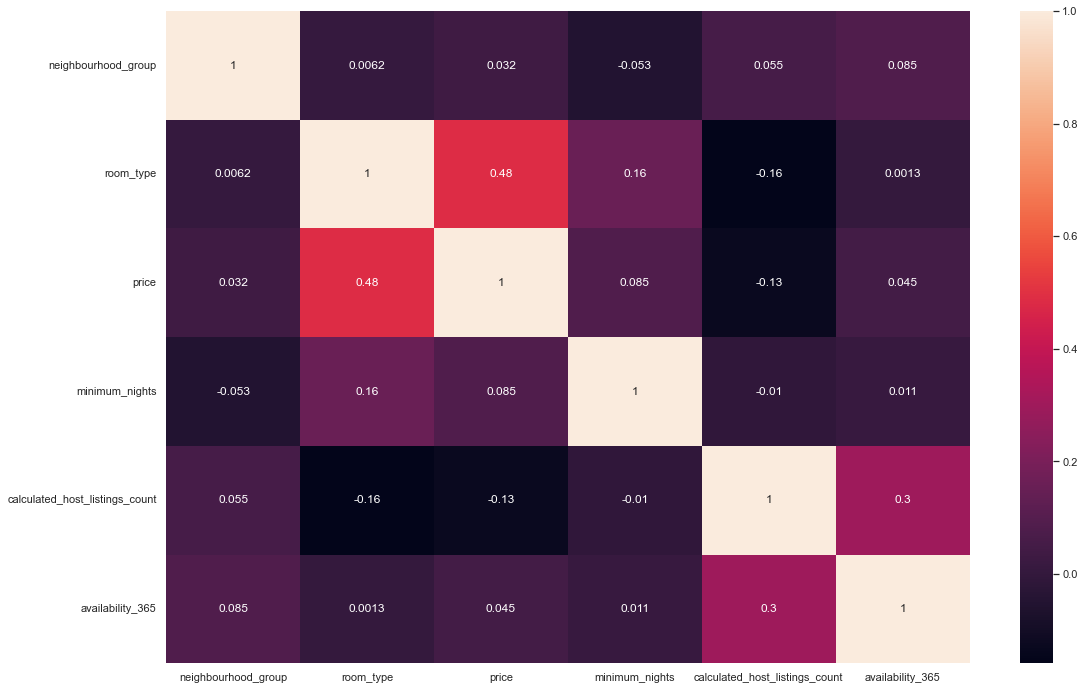

In [38]:
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True)
airbnb_en.columns


Import libraries

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

Defining the independent variables and dependent variables

In [40]:
x = airbnb_en.iloc[:, [0, 1, 3, 4, 5]]
y = airbnb_en['price']
#Getting Test and Training Set
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=.1, random_state=353)
x_train.head()
y_train.head()


19198    125
34718     40
7437     150
46353     45
23261     76
Name: price, dtype: int64

In [41]:
x_train.shape


(34958, 5)

Prepare a Linear Regression Model

In [42]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.07871964101889461

Prepairing a Decision Tree Regression

In [43]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.12832255536824277

In [44]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.1283240383410389

### End